<a href="https://colab.research.google.com/github/sartansartan/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/ASartan_LS_DS_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.data to house-votes-84.data


In [3]:
df = pd.read_csv("house-votes-84.data", header=None)
df.columns = ['Class Name', 'handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 
           'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
           'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
df = df.replace({"n":0, "y":int('1'), '?': np.NaN})
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
df_rep = df[df['Class Name'] == 'republican']
df_dem = df[df['Class Name'] == 'democrat']

In [0]:
df_rep2 = df_rep.dropna()
df_dem2 = df_dem.dropna()

In [0]:
from scipy import stats 

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval)

In [0]:
columns = ['handicapped-infants', 'water-project-cost-sharing', 
           'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 
           'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
           'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 
           'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

In [16]:
confidence_interval(df_dem2[col])

(0.9435483870967742, 0.9023566825660085, 0.98474009162754)

In [0]:
conf_dem = []
for col in columns:
  m = confidence_interval(df_dem2[col])
  conf_dem.append(m)


In [121]:
conf_dem

[(0.5887096774193549, 0.5008854514528094, 0.6765339033859004),
 (0.45161290322580644, 0.3627917755681809, 0.540434030883432),
 (0.8548387096774194, 0.791966749899413, 0.9177106694554258),
 (0.04838709677419355, 0.01008836071171925, 0.08668583283666784),
 (0.20161290322580644, 0.13000591391201893, 0.27321989253959394),
 (0.4435483870967742, 0.3548790007497182, 0.5322177734438303),
 (0.7661290322580645, 0.6905800506734978, 0.8416780138426312),
 (0.8306451612903226, 0.7637035637475735, 0.8975867588330717),
 (0.7903225806451613, 0.7176672431336555, 0.862977918156667),
 (0.532258064516129, 0.44320399355877216, 0.6213121354734858),
 (0.5080645161290323, 0.41883613678222775, 0.5972928954758367),
 (0.12903225806451613, 0.06919940918552969, 0.18886510694350256),
 (0.2903225806451613, 0.2093085202865504, 0.3713366410037722),
 (0.3467741935483871, 0.26182787733541646, 0.4317205097613578),
 (0.5967741935483871, 0.5092216687100866, 0.6843267183866877),
 (0.9435483870967742, 0.9023566825660085, 0.98

In [0]:
df_final_dem = pd.DataFrame(data=conf_dem, index = columns, columns = ['mean', 'mean_MIN_interval', 'mean_PLU_interval'])


In [123]:
df_final_dem.head()

,mean,mean_MIN_interval,mean_PLU_interval
handicapped-infants,0.588710,0.500885,0.676534
water-project-cost-sharing,0.451613,0.362792,0.540434
adoption-of-the-budget-resolution,0.854839,0.791967,0.917711
physician-fee-freeze,0.048387,0.010088,0.086686
el-salvador-aid,0.201613,0.130006,0.273220


In [0]:
conf_rep = []
for col in columns:
  m = confidence_interval(df_rep2[col])
  conf_rep.append(m)

In [0]:
df_final_rep = pd.DataFrame(data=conf_rep, index = columns, columns = ['mean', 'mean_Min_interval', 'mean_Plu_interval'])


In [126]:
df_final_rep.head()

,mean,mean_Min_interval,mean_Plu_interval
handicapped-infants,0.212963,0.134503,0.291422
water-project-cost-sharing,0.472222,0.376548,0.567896
adoption-of-the-budget-resolution,0.157407,0.087614,0.227201
physician-fee-freeze,0.990741,0.972385,1.009096
el-salvador-aid,0.953704,0.913434,0.993973


In [0]:
import matplotlib.pyplot as plt
import matplotlib.style as style

In [0]:
data_dem = df_final_dem
data_rep = df_final_rep

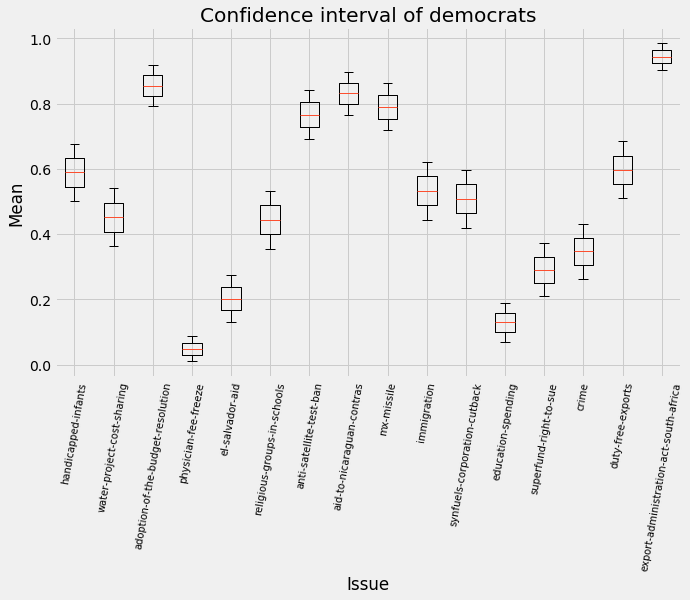

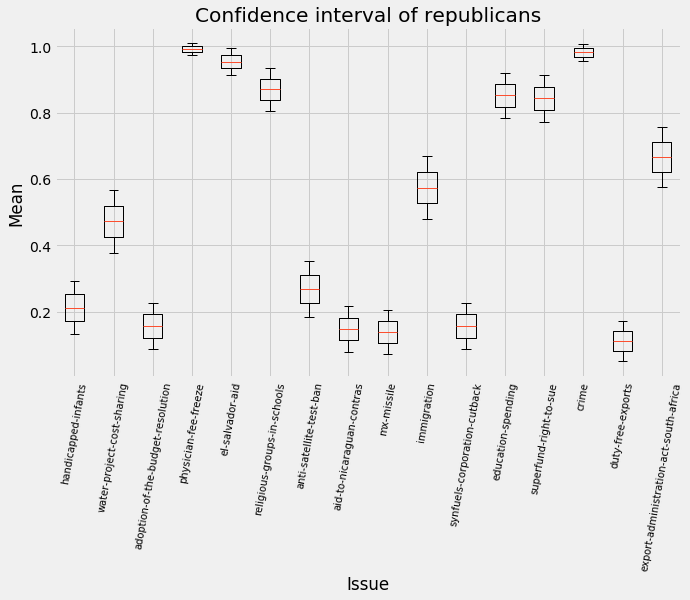

In [131]:
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.boxplot(data_dem);

fig2, ax2 = plt.subplots(figsize=(10, 6))
ax2.boxplot(data_rep)

ax1.set_title('Confidence interval of democrats')
ax1.set_xlabel('Issue')
ax1.set_ylabel('Mean')

ax2.set_title('Confidence interval of republicans')
ax2.set_xlabel('Issue')
ax2.set_ylabel('Mean')

xtickNames = plt.setp(ax1, xticklabels=columns)
plt.setp(xtickNames, rotation=80, fontsize=10)

xtickNames = plt.setp(ax2, xticklabels=columns)
plt.setp(xtickNames, rotation=80, fontsize=10)

style.use('fivethirtyeight')


In [0]:
#Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
#The poll is belived to be accurate within ((mean_plus - mean_mins)/2), 19 times out of 20

In [0]:
#With 95% confidence between 0.12 and 0.24 republicans will support 'handicapped-infants' cause

In [0]:
#Take a dataset that we have used in the past in class that has categorical variables. 
#Pick two of those categorical variables and run a chi-squared tests on that data

#    By hand using Numpy
#    In a single line using Scipy


In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
df = df.sort_values(by='marital-status')
# https://github.com/pandas-dev/pandas/issues/25278
contingency_table = pd.crosstab(df['marital-status'], df['salary'], margins=True)
contingency_table

salary,<=50K,>50K,All
marital-status,,,
Divorced,3980,463,4443
Married-AF-spouse,13,10,23
Married-civ-spouse,8284,6692,14976
Married-spouse-absent,384,34,418
Never-married,10192,491,10683
Separated,959,66,1025
Widowed,908,85,993
All,24720,7841,32561


In [33]:
row_sums = contingency_table.iloc[0:7, 2].values
col_sums = contingency_table.iloc[7, 0:2].values

print(row_sums)
print(col_sums)

[ 4443    23 14976   418 10683  1025   993]
[24720  7841]


In [0]:
total = contingency_table.loc['All','All']


In [35]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(7, 2)
[[3.37308314e+03 1.06991686e+03]
 [1.74613802e+01 5.53861982e+00]
 [1.13696361e+04 3.60636393e+03]
 [3.17341605e+02 1.00658395e+02]
 [8.11043150e+03 2.57256850e+03]
 [7.78170204e+02 2.46829796e+02]
 [7.53876109e+02 2.39123891e+02]]


In [36]:
observed = pd.crosstab(df['marital-status'], df['salary']).values
print(observed.shape)
observed

(7, 2)


array([[ 3980,   463],
       [   13,    10],
       [ 8284,  6692],
       [  384,    34],
       [10192,   491],
       [  959,    66],
       [  908,    85]])

In [37]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

6517.741653663022

In [38]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

6517.741653663022 0.0 6 [[3.37308314e+03 1.06991686e+03]
 [1.74613802e+01 5.53861982e+00]
 [1.13696361e+04 3.60636393e+03]
 [3.17341605e+02 1.00658395e+02]
 [8.11043150e+03 2.57256850e+03]
 [7.78170204e+02 2.46829796e+02]
 [7.53876109e+02 2.39123891e+02]]


In [0]:
#Null Hypothesis: martial status is independent of salary.

#Due to a p-value of 0, we REJECT the null hypothesis that martial status and salary are independent, 
#and conclude that there is an association between martial status and salary.


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)